<h1 style="text-align:center">"Zeros" in a Forced Response</h1>
<h3 style="text-align:center">MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/FourMass_5Spring_Undamped.png" alt="A Four-Mass-Spring System" width=100%/><br>
    <strong>Figure 1: A Four-Mass-Spring System with Excitation Force on the First Mass</strong>
</p>

This notebook demonstrates the eigenvalue/eigenvector problem using a four-mass-spring-damper system shown in Figure 1. We'll just look at one example set of parameters. The same techniques apply for other parameters and for larger matrices. 

The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = f $

$ \quad m_2 \ddot{x}_2 -k_2 x_1 + (k_2 + k_3)x_2 - k_3 x_3 = 0 $

$ \quad m_3 \ddot{x}_3 -k_3 x_2 + (k_3 + k_4)x_3 - k_4 x_4 = 0 $

$ \quad m_4 \ddot{x}_4 -k_4 x_3 + (k_4 + k_5)x_4 = 0 $

We could also write these equations in matrix form:

$ \quad \begin{bmatrix} m_1 & 0 & 0 & 0\\ 
                        0 & m_2 & 0 & 0\\ 
                        0 & 0 & m_3 & 0\\ 
                        0 & 0 & 0 & m_4\\ \end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2
                        \\ \ddot{x}_3\\ \ddot{x}_4\end{bmatrix} + 
%         
         \begin{bmatrix} k_1 + k_2 & -k_2 & 0 & 0 \\ 
                        -k_2 & k_2 + k_3 & -k_3 & 0 \\
                        0 & -k_3 & k_3 + k_4 & -k_4 \\
                        0 & 0 & -k_4 & k_4+k_5\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\\ x_3\\ x_4\end{bmatrix} = \begin{bmatrix}f \\ 0 \\ 0 \\ 0 \end{bmatrix}$

Define

$ \quad M = \begin{bmatrix} m_1 & 0 & 0 & 0\\ 
                        0 & m_2 & 0 & 0\\ 
                        0 & 0 & m_3 & 0\\ 
                        0 & 0 & 0 & m_4\\ \end{bmatrix} $

and 

$ \quad K = \begin{bmatrix} k_1 + k_2 & -k_2 & 0 & 0 \\ 
                        -k_2 & k_2 + k_3 & -k_3 & 0 \\
                        0 & -k_3 & k_3 + k_4 & -k_4 \\
                        0 & 0 & -k_4 & k_4+k_5\end{bmatrix} $

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = 0 $ 

for $\bar{X}$. This is an eigenvalue problem.

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the [Scipy version of the linear algebra module](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.linalg.eigh.html). It allows us to solve the "general" eignevalue problem.

In [1]:
import numpy as np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
#  Note: Using the 'from module import *' notation is usually a bad idea. 
import matplotlib.pyplot as plt

In [3]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

To see how to solve this eigenvalue problem, we will use some example parameters, set up below. All the spring constants are equal and the masses are equal.

In [4]:
# Define the matrices
m1 = 1.0
m2 = 1.0
m3 = 1.0
m4 = 1.0

k1 = 4.0 
k2 = 4.0
k3 = 4.0
k4 = 4.0
k5 = 4.0

M = np.array([[m1, 0, 0, 0],
                [0, m2, 0, 0],
                [0, 0, m3, 0],
                [0, 0, 0, m4]])

K = np.array([[k1 + k2, -k2, 0, 0],
                [-k2, k2 + k3, -k3, 0],
                [0, -k3, k3 + k4, -k4],
                [0, 0, -k4, k4+k5]])

In [5]:
# We'll use the scipy version of the linear algebra
from scipy import linalg

eigenvals, eigenvects = linalg.eigh(K,M)


The linalg.eigh function returns two arrays, one of the eigenvalues and one of the eigenvectors. The eigenvalues are the square of the two natural frequencies. The eigenvectors are returned in normalized form, with each ''row'' of the array representing an eigenvector.


In [6]:
print('\n')
print('The resulting eigenalues are {:.2f}, {:.2f}, {:.2f}, and {:.2f}.'.format(eigenvals[0], eigenvals[1], eigenvals[2], eigenvals[3]))
print('\n')
print('So the natrual frequencies are {:.2f}rad/s, {:.2f}rad/s, {:.2f}rad/s, and {:.2f}rad/s.'.format(np.sqrt(eigenvals[0]), np.sqrt(eigenvals[1]), np.sqrt(eigenvals[2]), np.sqrt(eigenvals[3])))
print('\n')



The resulting eigenalues are 1.53, 5.53, 10.47, and 14.47.


So the natrual frequencies are 1.24rad/s, 2.35rad/s, 3.24rad/s, and 3.80rad/s.




In [7]:
print('\n')
print('The first eigenvector is ' + str(eigenvects[:,0]) + '.')
print('\n')
print('The second eigenvector is ' + str(eigenvects[:,1]) + '.')
print('\n')
print('The third eigenvector is ' + str(eigenvects[:,2]) + '.')
print('\n')
print('The fourth eigenvector is ' + str(eigenvects[:,3]) + '.')
print('\n')



The first eigenvector is [ 0.372  0.602  0.602  0.372].


The second eigenvector is [-0.602 -0.372  0.372  0.602].


The third eigenvector is [-0.602  0.372  0.372 -0.602].


The fourth eigenvector is [-0.372  0.602 -0.602  0.372].




# Responses
Now, let's look at the response and see how it reflects the four modes of the system.

In [8]:
# Define the equations of motion

# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot, x3, x3_dot, x4, x4_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, m3, m4, k1, k2, k3, k4, k5]
    """
    x1, x1_dot, x2, x2_dot, x3, x3_dot, x4, x4_dot = w
    m1, m2, m3, m4, k1, k2, k3, k4, k5 = p

    # Create sysODE = (x', x_dot'): - Here, we're assuming f(t) = 0
    sysODE = [x1_dot,
             (-(k1+k2)*x1 + k2*x2) / m1,
             x2_dot,
             (k2*x1 - (k2+k3)*x2 + k3*x3) / m2,
             x3_dot,
             (k3*x2 - (k3+k4)*x3 + k4*x4) / m3,
             x4_dot,
             (k4*x3 - (k4+k5)*x4) / m4]
    return sysODE

In [9]:
# Import the ODE solver
from scipy.integrate import odeint  

# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 10.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0,stoptime,numpoints)

## Example Free Vibration
Let's start by looking at some free vibration. For this set of parameters. In the code below, we choose initial conditions:

$ \quad x_1(0) = x_2(0) = x_0$

$ \quad x_3(0) = x_4(0) = 0$

and 

$ \quad \dot{x}_1(0) = \dot{x}_2(0) = \dot{x}_3(0) = \dot{x}_4(0) = 0$

In [10]:
# Initial conditions
x1_init = 0.5                       # initial x1 position
x1_dot_init = 0.0                   # initial x1 velocity
x2_init = 0.5                       # initial x2 position
x2_dot_init = 0.0                   # initial x2 velocity
x3_init = 0.0
x3_dot_init = 0.0
x4_init = 0.0
x4_dot_init = 0.0

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, m3, m4, k1, k2, k3, k4, k5]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init, x3_init, x3_dot_init, x4_init, x4_dot_init]

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

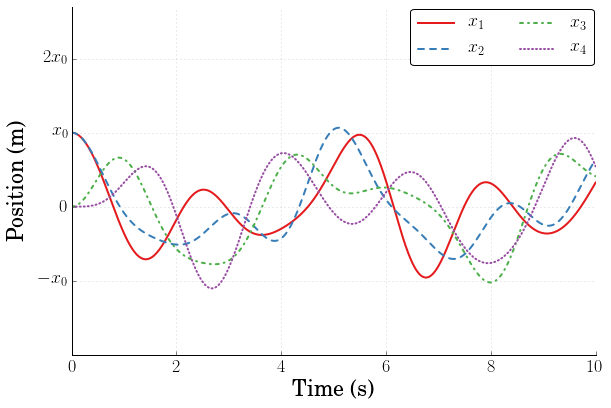

In [11]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t,resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t,resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')
plt.plot(t,resp[:,4],linewidth=2,linestyle="-.",label=r'$x_3$')
plt.plot(t,resp[:,6],linewidth=2,linestyle=":",label=r'$x_4$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1.35)
plt.yticks([-0.5,0,0.5,1.0],['$-x_0$','$0$','$x_0$','$2x_0$'])

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('FreeVibration_mode_1.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Frequency Response – Force on $m_1$
Now, let's look at the frequency response of this system. It will tell us how many frequencies there can be zero amplitude response for each mass.

In [12]:
F1 = 1.0
F2 = 0.0
F3 = 0.0
F4 = 0.0

F = [F1, F2, F3, F4]

w = np.linspace(0,6,1800)
X = np.zeros((len(w),4))

# This is (K-w^2 M)^-1 * F
for ii, freq in enumerate(w):
    X[ii,:] = np.dot(linalg.inv(K - freq**2 * M), F)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(X[:,0]) >= 15)
X[pos,:] = np.nan
w[pos] = np.nan

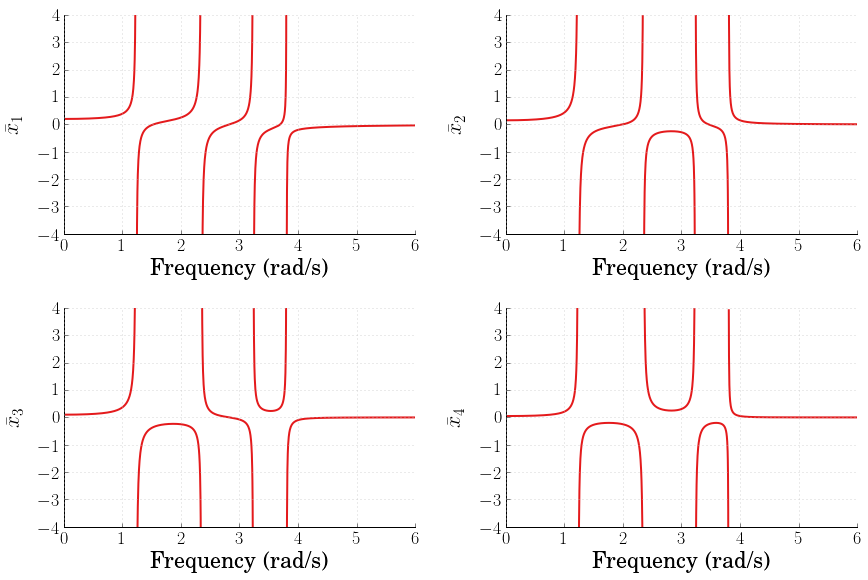

In [13]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(12,8))

plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)


plt.subplot(2,2,1)
plt.plot(w,X[:,0],linewidth=2,label=r'$\bar{x}_1$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_1$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-4,4)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')



plt.subplot(2,2,2)
plt.plot(w,X[:,1],linewidth=2,linestyle="-",label=r'$\bar{x}_2$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_2$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-4,4)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.subplot(2,2,3)
plt.plot(w,X[:,2],linewidth=2,linestyle="-",label=r'$\bar{x}_3$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_3$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-4,4)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.subplot(2,2,4)
plt.plot(w,X[:,3],linewidth=2,linestyle="-",label=r'$\bar{x}_4$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_4$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-4,4)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5, w_pad=3.0, h_pad=2.0)


# save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_Amp.pdf')

# fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Frequency Response – Force on $m_2$
All we need to change to examine the case in Figure 2, which has the force input on the second mass, is the $F$ matrix we defined above. Then, a replot of the frequency repsonses will show at what (and how many) frequencies each mass has a zero amplitude response.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/FourMass_5Spring_Undamped_2massForced.png" alt="A Four-Mass-Spring System" width=100%/><br>
    <strong>Figure 2: A Four-Mass-Spring System with Excitation Force on the Second Mass</strong>
</p>

In [14]:
F1 = 0.0
F2 = 1.0
F3 = 0.0
F4 = 0.0

F = [F1, F2, F3, F4]

w = np.linspace(0,6,1200)
X = np.zeros((len(w),4))

# This is (K-w^2 M)^-1 * F
for ii, freq in enumerate(w):
    X[ii,:] = np.dot(linalg.inv(K - freq**2 * M), F)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(X[:,0]) >= 15)
X[pos,:] = np.nan
w[pos] = np.nan

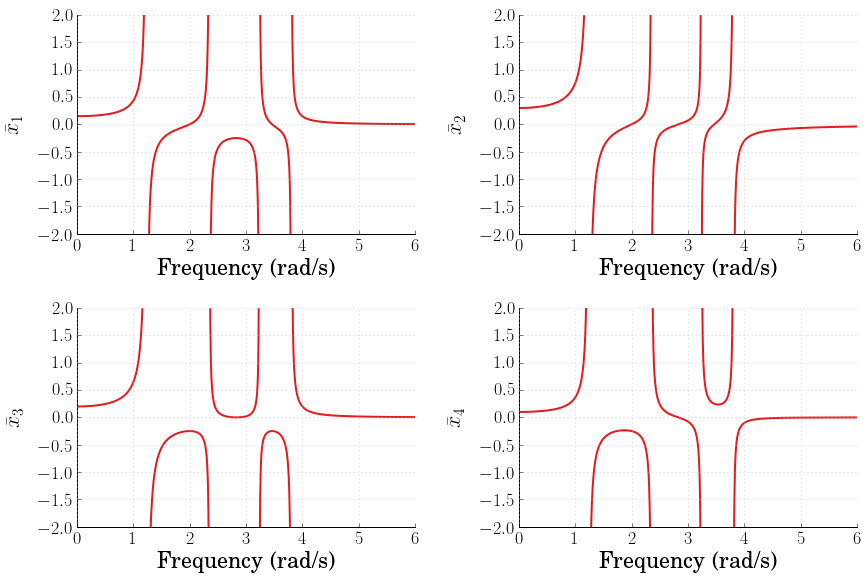

In [15]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(12,8))

plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)


plt.subplot(2,2,1)
plt.plot(w,X[:,0],linewidth=2,label=r'$\bar{x}_1$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_1$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.subplot(2,2,2)
plt.plot(w,X[:,1],linewidth=2,linestyle="-",label=r'$\bar{x}_2$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_2$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.subplot(2,2,3)
plt.plot(w,X[:,2],linewidth=2,linestyle="-",label=r'$\bar{x}_3$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_3$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.subplot(2,2,4)
plt.plot(w,X[:,3],linewidth=2,linestyle="-",label=r'$\bar{x}_4$')
# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel(r'$\bar{x}_4$',family='serif',fontsize=22,weight='bold',labelpad=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5, w_pad=3.0, h_pad=2.0)


# save the figure as a high-res pdf in the current folder
# plt.savefig('Spring_Pendulum_Example_Amp.pdf')

# fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [16]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())